# Asteroid clusters in our solar system

In this notebook we'll read in all the asteroids (planetoid, actually bcs they look like PLANETS not stars! #petpeeve) data of the Minor Planet Center and do things with it like:

- see if we can categorise them in any recognisable and scientifically sound way
- use clustering to see if we can identify known planetoid 'families'
- do some prettifying
- plot them in a 3D matrix in relation to Earth

_This research has made use of data and/or services provided by the International Astronomical Union's Minor Planet Center._

See https://www.minorplanetcenter.net/ for more on what they do. There you can also find the dataset you need called 'mpcorb_extended.json.gz'. This is updated daily and quite large, so the first challenge is how we can process such a large dataset of over 800MiB in size.

Let's start by importing the modules and reading in the dataset. The entire file 'mpcorb_extended.json' takes a couple of minutes to load depending on your machine's speed. If it takes too long make a subset taking care not to mess up the json structure.

In [2]:
# import the modules needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

asteroids = pd.read_json('mpcorb_extended.json')
asteroids.head()

,Critical_list_numbered_object_flag,H,G,Num_obs,rms,U,Arc_years,Perturbers,Perturbers_2,Number,...,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type,NEO_flag,One_km_NEO_flag,PHA_flag,One_opposition_object_flag,Arc_length
0,1.0,3.34,0.15,7330.0,0.80,0,1801-2024,M-v,30k,(1),...,2.547548,2.985692,1.374636,1.277642,MBA,NaN,NaN,NaN,NaN,NaN
1,1.0,4.11,0.15,8964.0,0.75,0,1804-2024,M-c,28k,(2),...,2.131950,3.408738,1.311617,1.276927,MBA,NaN,NaN,NaN,NaN,NaN
2,1.0,5.18,0.15,7523.0,0.83,0,1804-2024,M-v,3Ek,(3),...,1.986328,3.354046,1.247522,1.297329,MBA,NaN,NaN,NaN,NaN,NaN
3,1.0,3.25,0.15,7647.0,0.82,0,1821-2024,M-p,18k,(4),...,2.148439,2.573411,1.170901,1.380571,MBA,NaN,NaN,NaN,NaN,NaN
4,1.0,6.99,0.15,3344.0,0.71,0,1845-2024,M-v,3Ek,(5),...,2.093559,3.058237,1.242790,1.319059,MBA,NaN,NaN,NaN,NaN,NaN


Let's see shape and stats of this thing.

In [17]:
print('Listing of all the columns in the df: ' + str(asteroids.columns), end='\n\n')
print('Description of the dataset: ' + str(asteroids.describe()), end='\n\n')
print('The info n this df: ' + str(asteroids.info()))

Listing of all the columns in the df: Index(['H', 'G', 'Num_obs', 'rms', 'U', 'Arc_years', 'Perturbers',
       'Perturbers_2', 'Number', 'Name', 'Principal_desig', 'Other_desigs',
       'Epoch', 'M', 'Peri', 'Node', 'i', 'e', 'n', 'a', 'Ref', 'Num_opps',
       'Computer', 'Hex_flags', 'Last_obs', 'Tp', 'Orbital_period',
       'Perihelion_dist', 'Aphelion_dist', 'Semilatus_rectum',
       'Synodic_period', 'Orbit_type', 'NEO_flag', 'One_km_NEO_flag',
       'PHA_flag', 'Critical_list_numbered_object_flag'],
      dtype='object')

Description of the dataset:                    H              G        Num_obs            rms  \
count  259064.000000  259064.000000  259064.000000  259064.000000   
mean       15.624104       0.150000    1030.016563       0.706585   
std         1.237219       0.000153     855.755289       0.071546   
min        -1.210000       0.090000      15.000000       0.060000   
25%        15.000000       0.150000     474.000000       0.670000   
50%        15.76000

Now we have the asteroids pandas dataframe to play with!
Let's create a graph of the inclination (angle) of the asteroids and distance relative to us. Because of the enormous distances we'll limit the graph to only 70 AU from us. That way we can see some clusters of asteroids pop up.

1 AU is the distance between us and the sun. Roughly 150 million kilometers. So let's look at only the first 70 AU out from us.

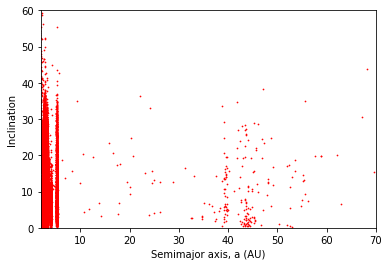

In [18]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Inclination')
x = asteroids['a']
y = asteroids['i']
plt.xlim([2,70])
plt.ylim([0,60])
plt.scatter(x,y, s=2, marker='.', color='r')
plt.show()


You notice that up to 50 AU away from us there are a couple of pretty obvious orbits with lots of planetoids in it. These are apparently not neatly located in the plane of the solar system but above it.

Next we'll have a look at the eccentricity of the orbits. If the eccentricity is 0 the orbit is more or less circular. If it is 1 the orbit is higly elliptical. And between 0 and 1 is anything inbetween.

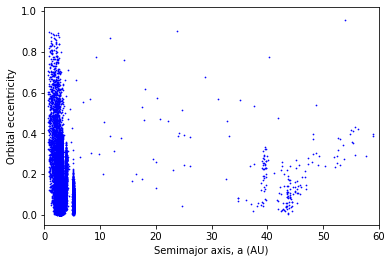

In [19]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Orbital eccentricity')
x = asteroids['a']
y = asteroids['e']
plt.xlim([0,60])
plt.scatter(x,y, s=2, marker='.', color='b')
plt.show()

So, apparently within the first ~7 AU there's all kinds of orbits but most seem to have an elliptical orbit. Farther out at 40 AU we see a band of asteroids and again at ~44 AU. These are both more or less circular or moderately elliptical. 

I'm guessing the ones close to earth are more likely to be caught in by Earth's gravity whereas the ones farther away are left-overs from when the Earth itself formed?

Anyway, let's zoom in on the first 5.5 AU by making the same graph but now with a limit of 5.5 AU set on the x-axis.

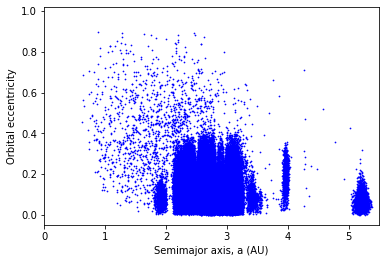

In [20]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Orbital eccentricity')
x = asteroids['a']
y = asteroids['e']
plt.xlim([0,5.5])
plt.scatter(x,y, s=2, marker='.', color='b')
plt.show()

This is more informative. Apparently just a few bands have a circular-ish orbit. And we see some planetoids groups orbiting at intervals. Also between 0.8 and ~3 AU there's a lot of stuff wizzing in all kinds of orbits, some wildly elliptical!

Let's look at just the bands between 1.8 and 3.5 AU.

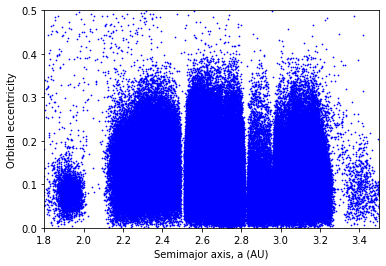

In [21]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Orbital eccentricity')
x = asteroids['a']
y = asteroids['e']
plt.xlim([1.8,3.5])
plt.ylim([0,0.5])
plt.scatter(x,y, s=2, marker='.', color='b')
plt.show()

Awesome! There seem to be six orbits between 1.8 and 3.5 AU! These are all orbits within what is called 'The Asteroid Belt'. In kilometers that belt is huge: roughly between 180 and 350 million kilometers from us when looking out from the sun!

Let's zoom in on the closest group. A quick Google search tells me it's the 'Hungaria Asteroid Group' (#petpeeve) that has an orbit between 1.78 and 2.00 AU. We'll look at it's magnitude distribution over distance.

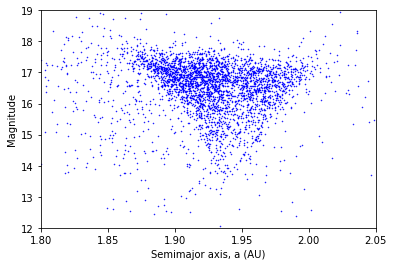

In [22]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Magnitude')
x = asteroids['a']
y = asteroids['H']
plt.xlim([1.8,2.05])
plt.ylim(12,19)
plt.scatter(x,y, s=1, marker='.', color='b')
plt.show()

And now lets look at the inclination over distance:

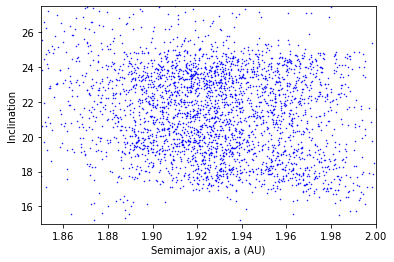

In [23]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Inclination')
x = asteroids['a']
y = asteroids['i']
plt.xlim([1.85,2.0])
plt.ylim(15,27.5)
plt.scatter(x,y, s=1, marker='.', color='b')
plt.show()

Now, let's use clustering to find out if there are any clusters hidden in this one band of asteroids! (also just by eye there seems to be some kind of resonance going on at 1.95 AU but let's just ignore that ^_^).

We start by keeping only the relevant columns.

In [24]:
#cols = ["a", "e", "i", "H"]
cols = ["a", "e", "i", "G","H", "Node", "Peri", "n"]
K_asteroids = asteroids[cols]
K_asteroids.head()

,a,e,i,G,H,Node,Peri,n
0,2.767182,0.078817,10.58635,0.15,3.33,80.26013,73.47045,0.214115
1,2.769632,0.230084,34.92703,0.15,4.12,172.91814,310.86479,0.213831
2,2.670137,0.256468,12.99067,0.15,5.16,169.84298,247.73655,0.225894
3,2.363038,0.088757,7.13926,0.15,3.22,103.75733,151.59911,0.271330
4,2.578698,0.187924,5.36013,0.15,7.00,141.52285,358.88647,0.238014


Now we have to scale a.k.a. normalise a.k.a standardise the data.

In [25]:
scaler = StandardScaler()
scaler.fit(K_asteroids)
scaled_data = scaler.transform(K_asteroids)

Next up is finding the amount of clusters that are seen in the dataset. I can use the "Elbow method" and I went with that. (source: https://towardsdatascience.com/how-to-perform-kmeans-clustering-using-python-7cc296cec092). Not sure if that is the best though... but that's for another day.

Basically the code iterates over a subset of the dataset ('cols' contains the columns) and does it's magic. Then we eyeball the amount of clusters from the graph and use that for the clustering with Kmeans. The value to set is where there is an 'elbow' or sudden change of vector of the graph.

In [26]:
def find_best_clusters(K_asteroids, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(K_asteroids)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

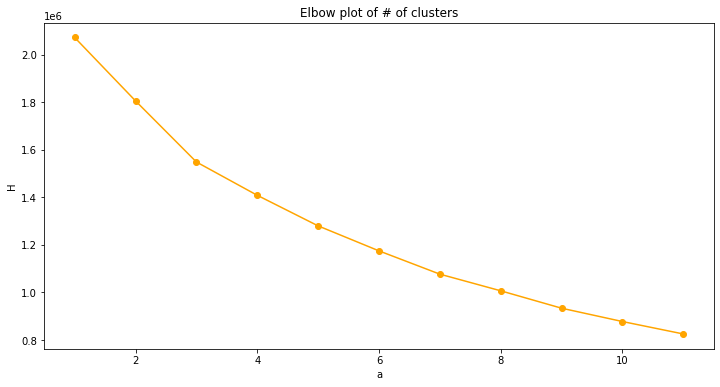

In [27]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("a")
    plt.ylabel("H")
    plt.title("Elbow plot of # of clusters")
    plt.show()

clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

You see there is no clear 'elbow' in this graph. Apparently the elbow method isn't working for this kind of data. So I'm just going for 6 clusters. Like I said, a different way to determine the number of clusters is a whole subject on its own so I'll stick to this for now.

In [31]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scaled_data)

K_asteroids["clusters"] = kmeans_model.labels_
K_asteroids.head()

/var/folders/yx/6fdh1fv55sqdhpcvnvmxqsz80000gn/T/ipykernel_30742/3885676891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K_asteroids["clusters"] = kmeans_model.labels_


,a,e,i,G,H,Node,Peri,n,clusters
0,2.767182,0.078817,10.58635,0.15,3.33,80.26013,73.47045,0.214115,0
1,2.769632,0.230084,34.92703,0.15,4.12,172.91814,310.86479,0.213831,0
2,2.670137,0.256468,12.99067,0.15,5.16,169.84298,247.73655,0.225894,0
3,2.363038,0.088757,7.13926,0.15,3.22,103.75733,151.59911,0.271330,0
4,2.578698,0.187924,5.36013,0.15,7.00,141.52285,358.88647,0.238014,0


Let's see the data and set the ranges of x and y to the same as we had when checking out the datapoints earlier where I thought I may have seen two clusters in the Hungaria group.

(12.0, 19.0)

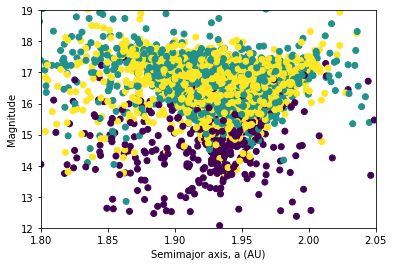

In [32]:
plt.xlabel('Semimajor axis, a (AU)')
plt.ylabel('Magnitude')
plt.scatter(K_asteroids["a"], 
            K_asteroids["H"], 
            c = K_asteroids["clusters"])
plt.xlim([1.8,2.05])
plt.ylim(12,19)

The graph says there are a couple of clusters in the group. But I have a gut feeling that's not right also bcs of the number of clusters we input was a wild guess. (if you play around with the number of clusters 2 or 3 seems to make much more sense)
Let's now prettify this graph and add labels, centres etc. That might also show us how far apart he cluster centres are. If they are close I call BS on this whole clustering thing. ^_^

In [33]:
#tbc